In [1]:
import tensorflow as tf
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def read_label():
    label = []
    filename_queue = tf.train.string_input_producer(["data/captcha/labels/labels.csv"])

    reader = tf.TextLineReader()
    key, value = reader.read(filename_queue)

    record_defaults = [['null'],['null']]
    deco = tf.decode_csv(value, record_defaults)
    with tf.Session() as sess:
        sess.run([tf.global_variables_initializer(), tf.local_variables_initializer()])
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)
        for i in range(40000):
            a, b = sess.run(deco)
            label.append(int(b))
    coord.request_stop()
    coord.join(threads)
    return label

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

filename0 = ('TFRecord/train-0.tfrecords')
filename1 = ('TFRecord/train-1.tfrecords')
filename2 = ('TFRecord/train-2.tfrecords')
filename3 = ('TFRecord/train-3.tfrecords')
filename4 = ('TFRecord/train-4.tfrecords')
filename5 = ('TFRecord/train-5.tfrecords')
filename6 = ('TFRecord/train-6.tfrecords')
filename7 = ('TFRecord/train-7.tfrecords')
filename8 = ('TFRecord/validation.tfrecords')
filename9 = ('TFRecord/test.tfrecords')

writer0 = tf.python_io.TFRecordWriter(filename0)
writer1 = tf.python_io.TFRecordWriter(filename1)
writer2 = tf.python_io.TFRecordWriter(filename2)
writer3 = tf.python_io.TFRecordWriter(filename3)
writer4 = tf.python_io.TFRecordWriter(filename4)
writer5 = tf.python_io.TFRecordWriter(filename5)
writer6 = tf.python_io.TFRecordWriter(filename6)
writer7 = tf.python_io.TFRecordWriter(filename7)
writer8 = tf.python_io.TFRecordWriter(filename8)
writer9 = tf.python_io.TFRecordWriter(filename9)

pic = os.listdir("data/captcha/images")
pic.sort(key=lambda x:int(x[:-4]))
label = read_label()
now_number = 0

for i in range(40000):
    files_name = os.path.join("data/captcha/images",pic[i])
    a_image = Image.open(files_name).convert('L')
    changed_image = a_image.resize((48,32), Image.ANTIALIAS)
    image_raw = np.array(changed_image).tobytes()
    now_number += 1
    
    example = tf.train.Example(features=tf.train.Features(feature={
             'label': _int64_feature(label[i]),
              'image_raw': _bytes_feature(image_raw)
         }))
    if now_number < 4000:
        writer0.write(example.SerializeToString())
        if now_number == 3999:
            print(now_number)
    elif now_number < 8000:
        writer1.write(example.SerializeToString())
    elif now_number < 12000:
        writer2.write(example.SerializeToString())
    elif now_number < 16000:
        writer3.write(example.SerializeToString())
    elif now_number < 20000:
        writer4.write(example.SerializeToString())
    elif now_number < 24000:
        writer5.write(example.SerializeToString())
    elif now_number < 28000:
        writer6.write(example.SerializeToString())
    elif now_number < 32000:
        writer7.write(example.SerializeToString())
    elif now_number < 36000:
        writer8.write(example.SerializeToString())
    elif now_number < 40000:
        writer9.write(example.SerializeToString())

writer0.close()
writer1.close()
writer2.close()
writer3.close()
writer4.close()
writer5.close()
writer6.close()
writer7.close()
writer8.close()
writer9.close()
print('ok')


    

3999
ok


label 0:  5604


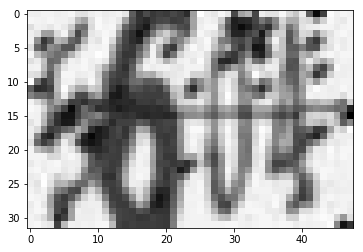

label 1:  4


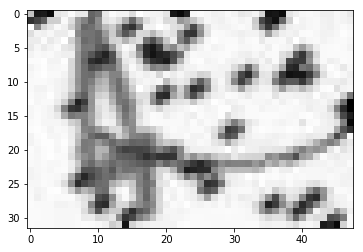

label 2:  3


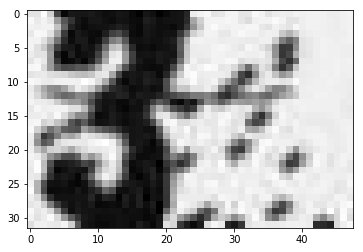

label 3:  463


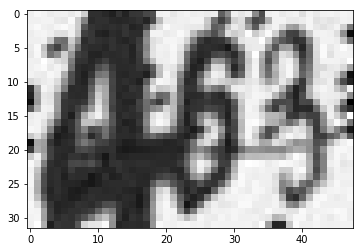

label 4:  7685


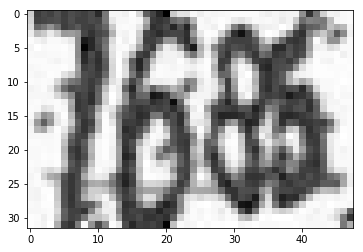

label 5:  5282


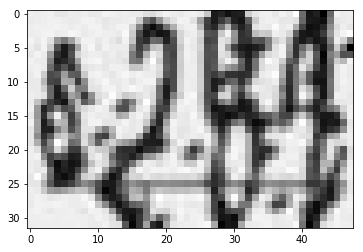

label 6:  7734


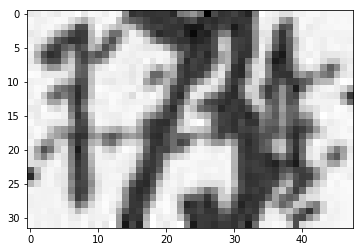

label 7:  458


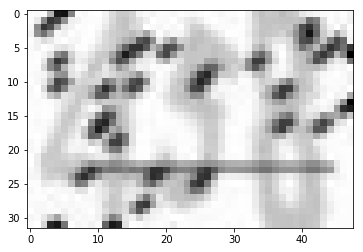

label 8:  8191


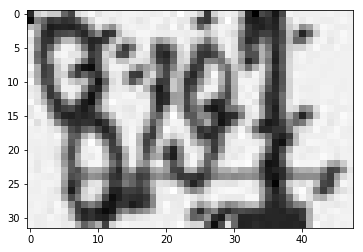

label 9:  2


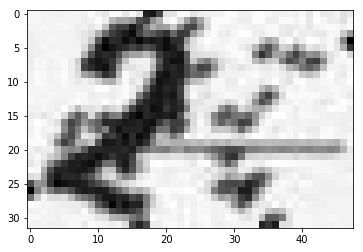

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

reader = tf.TFRecordReader()
train_name = ["train-0.tfrecords", "train-1.tfrecords", "train-2.tfrecords", "train-3.tfrecords", "train-4.tfrecords", "train-5.tfrecords", "train-6.tfrecords", "train-7.tfrecords"]
#     train_name = ["validation.tfrecords"]
xx = []
for i in train_name:
    file = os.path.join("TFRecord/",i)
    xx.append(file)
filename_queue = tf.train.string_input_producer(xx)

_, serialized_example = reader.read(filename_queue)

features = tf.parse_single_example(
        serialized_example,
        features={
        'image_raw': tf.FixedLenFeature([], tf.string),
        'label': tf.FixedLenFeature([], tf.int64)
    })
labels = tf.cast(features['label'], tf.int32)
images = tf.decode_raw(features['image_raw'], tf.uint8)
images = tf.reshape(images,[32,48])


with tf.Session() as sess:
    images_batch, labels_batch = tf.train.batch([images, labels],
                                                            batch_size=100,
                                                            capacity=500,
                                                            )
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    image, label = sess.run([images_batch, labels_batch])
    for i in range(10):
        print('label %d:  %d' %(i, label[i]))
        plt.imshow(image[i],cmap='gray')
        plt.show()
    coord.request_stop()
    coord.join(threads)

# with tf.Session() as sess:
#     images_batch, labels_batch = tf.train.shuffle_batch([images, labels],
#                                                             batch_size=30,
#                                                             num_threads=2,
#                                                             capacity=500,
#                                                             min_after_dequeue=450
#                                                             )
#     coord = tf.train.Coordinator()
#     threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
#     image, label = sess.run([images_batch, labels_batch])
#     for i in range(30):
#         print('label:%d' %label[i])
#         plt.imshow(image[i],cmap='gray')
#         plt.show()
        
#     coord.request_stop()
#     coord.join(threads)

# with tf.Session() as sess:
#     sess.run([tf.global_variables_initializer(), tf.local_variables_initializer()])
#     coord = tf.train.Coordinator()
#     threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
#     for i in range(50):
#         image, label = sess.run([images, labels])
#         plt.title('label:%d' %label)
#         plt.imshow(image, cmap='gray')
#         plt.show()
#     coord.request_stop()
#     coord.join(threads)
